In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# build a funcition to load the data
def load_data(path):
    return pd.read_csv(path)

In [3]:
# load train data
train = load_data("Data/titanic/train.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# load test data
test = load_data("Data/titanic/test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
train.shape

(891, 12)

### Clean the data

In [7]:
# check if there id null values
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


by see the data there is a missing values we have to deal with
"the age, fare, cabin"

In [8]:
train.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)
test.drop(['Cabin', 'Ticket'], axis = 1, inplace = True)

In [9]:
train['Age'].fillna(train['Age'].median(),inplace = True)
test['Age'].fillna(test['Age'].median(),inplace = True)

In [10]:
train['Age'].isna().sum()

0

In [11]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [12]:
train['Embarked'].isna().sum()

2

In [13]:
train['Embarked'].dropna().mode()[0]

'S'

In [14]:
train.fillna(train['Embarked'].dropna().mode()[0], inplace = True)
test.fillna(test['Embarked'].dropna().mode()[0], inplace = True)

In [15]:
train['Embarked'].isna().sum()

0

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(3)
memory usage: 69.7+ KB


### Now after we clean the data let's analyse it

#### see each coulmn if have a relation with Surviving

In [17]:
# with six
sexWithSurvived = train.groupby('Sex')['Survived'].mean().sort_values().reset_index()
sexWithSurvived

,Sex,Survived
0,male,0.188908
1,female,0.742038


there is 74% for the Survive is fameles and near of 19% is men

Text(0.5, 1.0, 'Showing male vs famale')

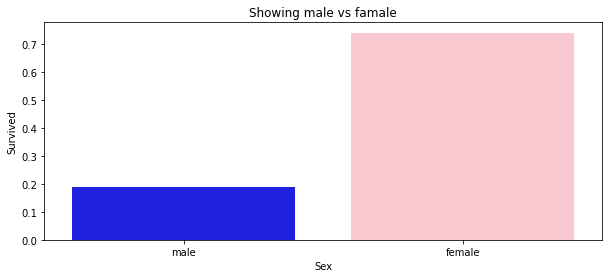

In [18]:
fig = plt.figure(figsize=(10,4))
color = ['blue','pink']
sns.barplot(x='Sex', y='Survived', data = sexWithSurvived, palette = color)
plt.title("Showing male vs famale")

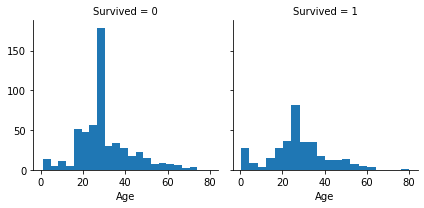

In [19]:
# age
g = sns.FacetGrid(train, col='Survived')
g.map(plt.hist, 'Age', bins=20)

In [20]:
# with sibsp
SibSpWithSurvived = train.groupby('SibSp')['Survived'].mean().sort_values().reset_index()
SibSpWithSurvived

,SibSp,Survived
0,5,0.000000
1,8,0.000000
2,4,0.166667
3,3,0.250000
4,0,0.345395
5,2,0.464286
6,1,0.535885


Text(0.5, 1.0, 'The relation if the passenger have no of sibblings and Spouse with surviving')

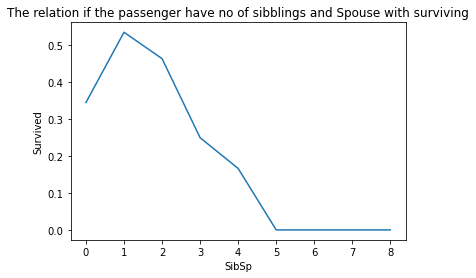

In [21]:
sns.lineplot(x="SibSp", y="Survived", data = SibSpWithSurvived)
plt.title("The relation if the passenger have no of sibblings and Spouse with surviving")

In [22]:
# with parch
ParchWithSurvived = train.groupby('Parch')['Survived'].mean().sort_values().reset_index()
ParchWithSurvived

,Parch,Survived
0,4,0.000000
1,6,0.000000
2,5,0.200000
3,0,0.343658
4,2,0.500000
5,1,0.550847
6,3,0.600000


Text(0.5, 1.0, 'The relation if the passenger have no of Parents and children with surviving')

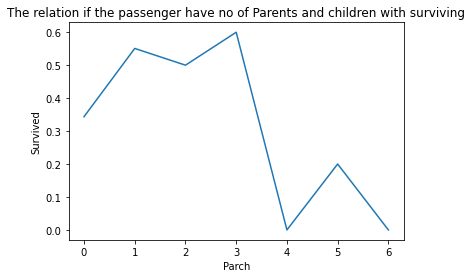

In [23]:
sns.lineplot(x="Parch", y="Survived", data = ParchWithSurvived)
plt.title("The relation if the passenger have no of Parents and children with surviving")

In [24]:
# if fearing have relathion with surviv
FareWithSurvived = train.groupby('Fare')['Survived'].mean().sort_values().reset_index()
FareWithSurvived

,Fare,Survived
0,8.7125,0.0
1,32.3208,0.0
2,11.5000,0.0
3,33.5000,0.0
4,34.0208,0.0
...,...,...
243,32.5000,1.0
244,12.0000,1.0
245,12.2875,1.0
246,8.1125,1.0


Text(0.5, 1.0, 'The relation between the fare and surviving')

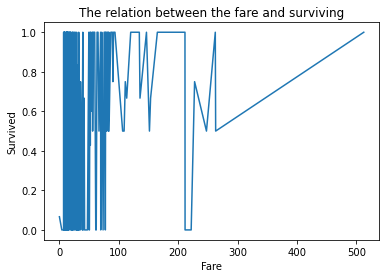

In [25]:
sns.lineplot(x="Fare", y="Survived", data = FareWithSurvived)
plt.title("The relation between the fare and surviving")

#### By seeing the graphs there is no relathion between them and surviving so we will try to build new features from them and delete them

In [26]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [27]:
combine = [train, test]

#### we will build new feature the title of each gender

In [28]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

In [29]:
pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


##### there is much titles we won't benifit from and they number is less so we will combine them in one title 'other'

In [30]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don',\
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [31]:
titleAndSurviving = train.groupby('Title')['Survived'].mean().sort_values().reset_index()
titleAndSurviving

,Title,Survived
0,Mr,0.156673
1,Other,0.347826
2,Master,0.575000
3,Miss,0.702703
4,Mrs,0.793651


<AxesSubplot:xlabel='Title', ylabel='Survived'>

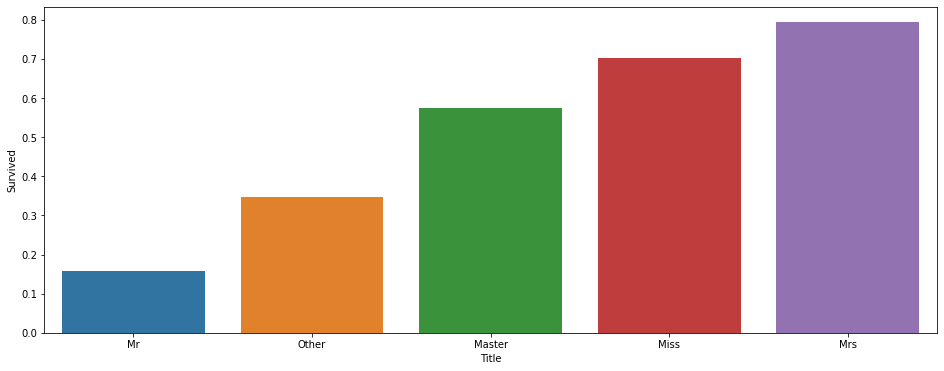

In [32]:
fig = plt.figure(figsize=(16,6) )
sns.barplot(x = 'Title', y = 'Survived', data = titleAndSurviving)

#### When we will do the model the features must not be as objects so we will transform then to numiric

In [33]:
mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Other": 5}
train['Title'] = train['Title'].map(mapping)
test['Title'] = test['Title'].map(mapping)
train['Title']

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1


In [34]:
# now we will delete the 'Name' coulmn we won't in need for it
train.drop(['Name'],axis = 1, inplace = True)
test.drop(['Name'], axis = 1, inplace = True)

combine = [train, test]

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,1
1,2,1,1,female,38.0,1,0,71.2833,C,3
2,3,1,3,female,26.0,0,0,7.9250,S,2
3,4,1,1,female,35.0,1,0,53.1000,S,3
4,5,0,3,male,35.0,0,0,8.0500,S,1


#### mapping the sex

In [36]:
# like i said the features in the end must be in numiric form for ml i will mapping the 'sex'
for dataset in combine:
     dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)

In [37]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.2500,S,1
1,2,1,1,1,38.0,1,0,71.2833,C,3
2,3,1,3,1,26.0,0,0,7.9250,S,2
3,4,1,1,1,35.0,1,0,53.1000,S,3
4,5,0,3,0,35.0,0,0,8.0500,S,1


#### i will cut the age into 5 stages to add features and see if will help me

In [38]:
train['AgeCen'] = pd.cut(train['Age'], 5)
AgeCenWithSurv = train.groupby('AgeCen')['Survived'].mean().sort_values().reset_index()

<AxesSubplot:xlabel='AgeCen', ylabel='Survived'>

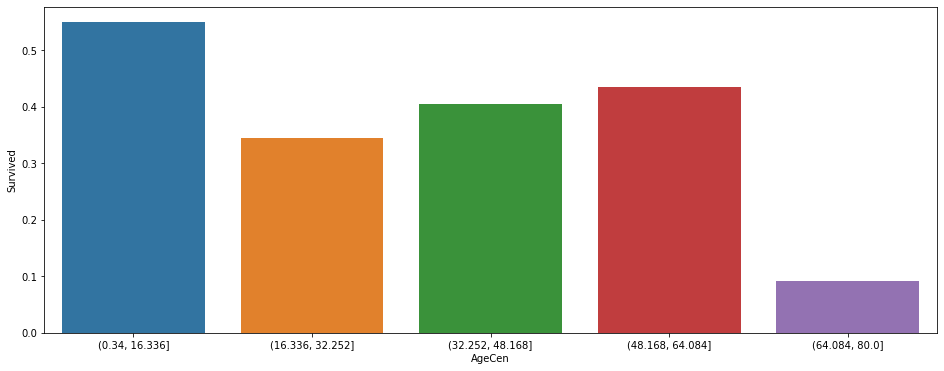

In [39]:
fig = plt.figure(figsize=(16,6) )
sns.barplot(x = 'AgeCen', y = 'Survived', data = AgeCenWithSurv)

In [40]:
# mapping the age by the stage
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']

In [41]:
train.drop(['AgeCen'], axis = 1, inplace = True)
train.head()
combine = [train, test]
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,1.0,1,0,7.2500,S,1
1,2,1,1,1,2.0,1,0,71.2833,C,3
2,3,1,3,1,1.0,0,0,7.9250,S,2
3,4,1,1,1,2.0,1,0,53.1000,S,3
4,5,0,3,0,2.0,0,0,8.0500,S,1


In [42]:
# add new features
for dataset in combine:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

In [43]:
famSizeSurv = train.groupby('FamilySize')['Survived'].mean().sort_values().reset_index()
famSizeSurv

,FamilySize,Survived
0,8,0.000000
1,11,0.000000
2,6,0.136364
3,5,0.200000
4,1,0.303538
5,7,0.333333
6,2,0.552795
7,3,0.578431
8,4,0.724138


<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

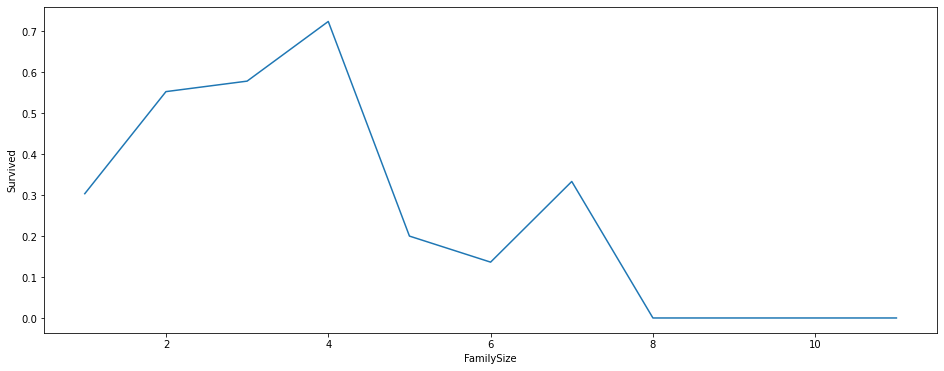

In [44]:
fig = plt.figure(figsize=(16,6) )
sns.lineplot(x = 'FamilySize', y = 'Survived', data = famSizeSurv)

In [45]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,1,0,3,0,1.0,1,0,7.2500,S,1,2,0
1,2,1,1,1,2.0,1,0,71.2833,C,3,2,0
2,3,1,3,1,1.0,0,0,7.9250,S,2,1,1
3,4,1,1,1,2.0,1,0,53.1000,S,3,2,0
4,5,0,3,0,2.0,0,0,8.0500,S,1,1,1


In [46]:
# i in no need for these coulmns so i will drop them
train = train.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test = test.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)

train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1.0,7.2500,S,1,0
1,2,1,1,1,2.0,71.2833,C,3,0
2,3,1,3,1,1.0,7.9250,S,2,1
3,4,1,1,1,2.0,53.1000,S,3,0
4,5,0,3,0,2.0,8.0500,S,1,1


In [47]:
lonlyWithSurviv = train.groupby('IsAlone')['Survived'].mean().sort_values().reset_index()
lonlyWithSurviv

,IsAlone,Survived
0,1,0.303538
1,0,0.505650


<AxesSubplot:xlabel='IsAlone', ylabel='Survived'>

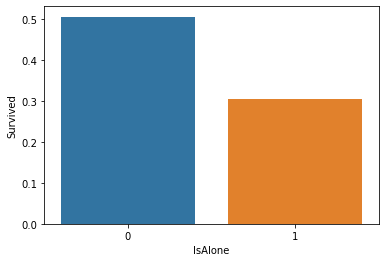

In [48]:
sns.barplot(x = 'IsAlone', y = 'Survived', data = lonlyWithSurviv)

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   Fare         891 non-null    float64
 6   Embarked     891 non-null    object 
 7   Title        891 non-null    int64  
 8   IsAlone      891 non-null    int64  
dtypes: float64(2), int64(6), object(1)
memory usage: 62.8+ KB


In [50]:
train['Embarked'].value_counts()

S    646
C    168
Q     77
Name: Embarked, dtype: int64

In [51]:
train['Embarked'] = train['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)
test['Embarked'] = test['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [52]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1.0,7.2500,0,1,0
1,2,1,1,1,2.0,71.2833,1,3,0
2,3,1,3,1,1.0,7.9250,0,2,1
3,4,1,1,1,2.0,53.1000,0,3,0
4,5,0,3,0,2.0,8.0500,0,1,1


#### there was a row that have value 'S' in the test set so i need to drop that row

In [53]:
# i = test[test['Fare'] == 'S'].index
# test = test.drop(i)
test['Fare'] = test['Fare'].replace(['S'], 20.0)
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Sex          418 non-null    int64  
 3   Age          418 non-null    float64
 4   Fare         418 non-null    float64
 5   Embarked     418 non-null    int64  
 6   Title        418 non-null    int64  
 7   IsAlone      418 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 26.2 KB


In [54]:
test['Fare'].fillna(test['Fare'].dropna().median(), inplace=True)
test.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2.0,7.8292,2,1,1
1,893,3,1,2.0,7.0000,0,3,0
2,894,2,0,3.0,9.6875,2,1,1
3,895,3,0,1.0,8.6625,0,1,1
4,896,3,1,1.0,12.2875,0,3,0


In [55]:
train['FareBand'] = pd.qcut(train['Fare'], 4)
train[['FareBand', 'Survived']].groupby(['FareBand'], as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [56]:
# ,apping the fare accourding to the fare stages the i have built
train.loc[ train['Fare'] <= 7.91, 'Fare'] = 0
train.loc[(train['Fare'] > 7.91) & (train['Fare'] <= 14.454), 'Fare'] = 1
train.loc[(train['Fare'] > 14.454) & (train['Fare'] <= 31), 'Fare']   = 2
train.loc[ train['Fare'] > 31, 'Fare'] = 3
train['Fare'] = train['Fare'].astype(int)

test.loc[ test['Fare'] <= 7.91, 'Fare'] = 0
test.loc[(test['Fare'] > 7.91) & (test['Fare'] <= 14.454), 'Fare'] = 1
test.loc[(test['Fare'] > 14.454) & (test['Fare'] <= 31), 'Fare']   = 2
test.loc[ test['Fare'] > 31, 'Fare'] = 3
test['Fare'] = test['Fare'].astype(int)

train = train.drop(['FareBand'], axis=1)
combine = [train, test]
    
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,1,0,3,0,1.0,0,0,1,0
1,2,1,1,1,2.0,3,1,3,0
2,3,1,3,1,1.0,1,0,2,1
3,4,1,1,1,2.0,3,0,3,0
4,5,0,3,0,2.0,1,0,1,1
5,6,0,3,0,1.0,1,2,1,1
6,7,0,1,0,3.0,3,0,1,1
7,8,0,3,0,0.0,2,0,4,0
8,9,1,3,1,1.0,1,0,3,0
9,10,1,2,1,0.0,2,1,3,0


### prepare the data

In [57]:
X_train = train.drop(["Survived","PassengerId"], axis=1)
Y_train = train["Survived"]
X_test  = test.drop("PassengerId", axis=1).copy()

 ### Now is time for modeling and prediction

#### i will use some models

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [59]:
def print_result(pred):
    print("the accuracy of the positive predictions is: ",precision_score(Y_train, pred))
    print("recall: ",recall_score(Y_train, pred))

In [60]:
# Logistic Regression
LR_M = LogisticRegression()
LR_M.fit(X_train, Y_train)

LogisticRegression()

In [61]:
Y_pred = LR_M.predict(X_test)
y_train_pred = cross_val_predict(LR_M, X_train, Y_train)
confusion_matrix(Y_train, y_train_pred)

array([[465,  84],
       [109, 233]])

In [62]:
# results for logistic reg and we get the model accurency by the f1 score
print_result(y_train_pred)
f1_log = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.7350157728706624
recall:  0.6812865497076024


In [63]:
# Support Vector Machines

svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
y_train_pred = cross_val_predict(svc, X_train, Y_train)
print_result(y_train_pred)
f1_svc = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.6997319034852547
recall:  0.7631578947368421


In [64]:
# KNN or k-Nearest Neighbors

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
y_train_pred = cross_val_predict(knn, X_train, Y_train)
print_result(y_train_pred)
f1_knn = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.735202492211838
recall:  0.6900584795321637


In [65]:
# Gaussian Naive Bayes

gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred_gnb = gaussian.predict(X_test)
y_train_pred = cross_val_predict(gaussian, X_train, Y_train)
print_result(y_train_pred)
f1_gua = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.6535796766743649
recall:  0.827485380116959


In [66]:
# Perceptron

perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
y_train_pred = cross_val_predict(perceptron, X_train, Y_train)
print_result(y_train_pred)
f1_per = precision_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.580952380952381
recall:  0.5350877192982456


In [67]:
# Linear SVC

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
y_train_pred = cross_val_predict(linear_svc, X_train, Y_train)
print_result(y_train_pred)
f1_lsvc = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.7237237237237237
recall:  0.7046783625730995


/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mu7annad.0gmail.com/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/mu7

In [68]:
# Stochastic Gradient Descent

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
y_train_pred = cross_val_predict(sgd, X_train, Y_train)
print_result(y_train_pred)
f1_sgd = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.5831533477321814
recall:  0.7894736842105263


In [69]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred_dt = decision_tree.predict(X_test)
y_train_pred = cross_val_predict(decision_tree, X_train, Y_train)
print_result(y_train_pred)
f1_dt = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.7871621621621622
recall:  0.6812865497076024


In [70]:
# Random Forest

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(X_train, Y_train)
Y_pred_rf = random_forest.predict(X_test)
y_train_pred = cross_val_predict(random_forest, X_train, Y_train)
print_result(y_train_pred)
f1_rf = f1_score(Y_train, y_train_pred)

the accuracy of the positive predictions is:  0.7654320987654321
recall:  0.7251461988304093


In [71]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'F1': [f1_svc, f1_knn, f1_log, 
              f1_rf, f1_gua, f1_per, 
              f1_sgd, f1_lsvc, f1_dt]})
sorted_model=models.sort_values(by='F1', ascending=False)
sorted_model

,Model,F1
3,Random Forest,0.744745
8,Decision Tree,0.730408
4,Naive Bayes,0.730323
0,Support Vector Machines,0.730070
7,Linear SVC,0.714074
1,KNN,0.711916
2,Logistic Regression,0.707132
6,Stochastic Gradient Decent,0.670807
5,Perceptron,0.580952


#### Random Forest has more score for this data

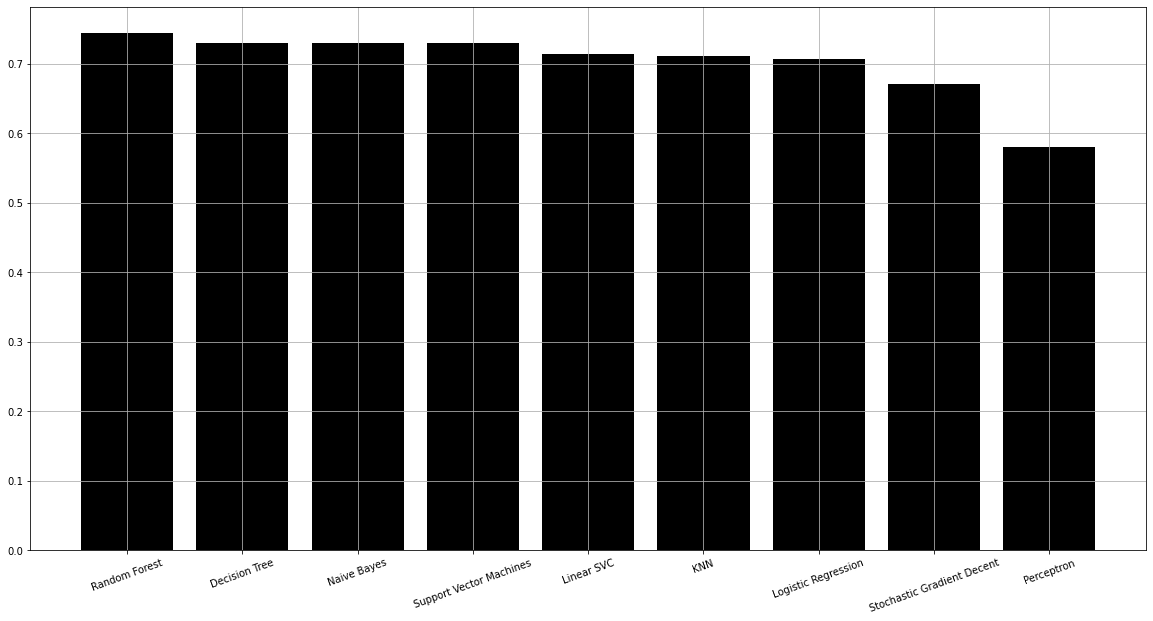

In [72]:
plt.figure(figsize=(20,10))
fig = plt.bar(sorted_model['Model'], sorted_model['F1'],color='black')
plt.xticks(rotation = 20)
plt.grid()
plt.show()

In [73]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": Y_pred_rf})
submission.to_csv('mySubmission4.csv', index=False)